1. Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load dataset 

In [6]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Quick info about types and nulls
df.info()

# Summary statistics
df.describe(include='all')

# Count missing values per column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3. Clean the data

In [11]:
data = df.copy()

# 1) Age: fill missing with median age
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)

# 2) Embarked: fill with mode
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(mode_embarked)

# 3) Drop Cabin (optional) because too many missing values
data = data.drop(columns=['Cabin'])

# 4) Ensure Survived is integer, Pclass is category
data['Survived'] = data['Survived'].astype(int)
data['Pclass'] = data['Pclass'].astype('category')

# Verify no missing Age/Embarked remain
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

4. Create age groups

In [10]:
# Define age bins and labels
bins = [0, 12, 18, 30, 50, 80]      # adjust bins as you like
labels = ['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-30)', 'Adult (31-50)', 'Senior (51+)']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

# Check counts per group
data['AgeGroup'].value_counts().sort_index()

AgeGroup
Child (0-12)            69
Teen (13-18)            70
Young Adult (19-30)    447
Adult (31-50)          241
Senior (51+)            64
Name: count, dtype: int64

In [18]:
# Create age groups
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-30)', 'Adult (31-50)', 'Senior (51+)']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)
data['AgeGroup'].value_counts().sort_index()

AgeGroup
Child (0-12)            69
Teen (13-18)            70
Young Adult (19-30)    447
Adult (31-50)          241
Senior (51+)            64
Name: count, dtype: int64

5. Answer the questions

In [19]:
# A — Who survived more: males or females?

# Survival counts by sex
survival_by_sex = data.groupby('Sex')['Survived'].agg(['sum','count'])
survival_by_sex['survival_rate_pct'] = (survival_by_sex['sum'] / survival_by_sex['count']) * 100
survival_by_sex

,sum,count,survival_rate_pct
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


In [26]:
#B — Did passenger class affect survival chances?

survival_by_class = data.groupby('Pclass')['Survived'].agg(['sum','count'])
survival_by_class['survival_rate_pct'] = (survival_by_class['sum'] / survival_by_class['count']) * 100
survival_by_class

C:\Users\vscha\AppData\Local\Temp\ipykernel_6420\1921389202.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = data.groupby('Pclass')['Survived'].agg(['sum','count'])


,sum,count,survival_rate_pct
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


In [21]:
#C — Survival rate by age group

survival_by_agegroup = data.groupby('AgeGroup')['Survived'].agg(['sum','count'])
survival_by_agegroup['survival_rate_pct'] = (survival_by_agegroup['sum'] / survival_by_agegroup['count']) * 100
survival_by_agegroup = survival_by_agegroup.sort_index()
display(survival_by_agegroup)

C:\Users\vscha\AppData\Local\Temp\ipykernel_6420\3568254287.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = data.groupby('AgeGroup')['Survived'].agg(['sum','count'])


,sum,count,survival_rate_pct
AgeGroup,,,
Child (0-12),40,69,57.971014
Teen (13-18),30,70,42.857143
Young Adult (19-30),148,447,33.109620
Adult (31-50),102,241,42.323651
Senior (51+),22,64,34.375000


6. Visualizations

C:\Users\vscha\AppData\Local\Temp\ipykernel_6420\2586440092.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, ci=None)


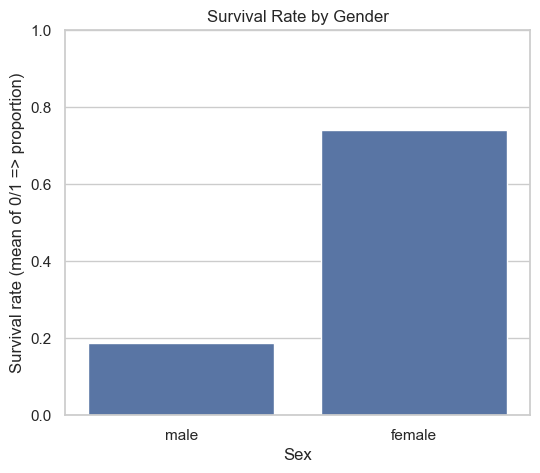

In [22]:
plt.figure(figsize=(6,5))
sns.barplot(x='Sex', y='Survived', data=data, ci=None)
plt.ylabel('Survival rate (mean of 0/1 => proportion)')
plt.title('Survival Rate by Gender')
plt.ylim(0,1)
plt.show()

C:\Users\vscha\AppData\Local\Temp\ipykernel_6420\382811965.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, ci=None)


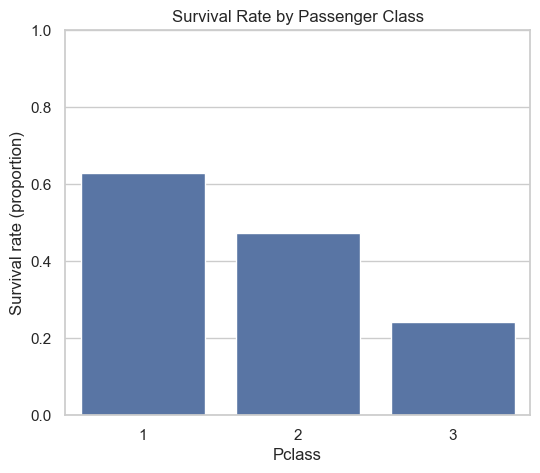

In [23]:
plt.figure(figsize=(6,5))
sns.barplot(x='Pclass', y='Survived', data=data, ci=None)
plt.ylabel('Survival rate (proportion)')
plt.title('Survival Rate by Passenger Class')
plt.ylim(0,1)
plt.show()

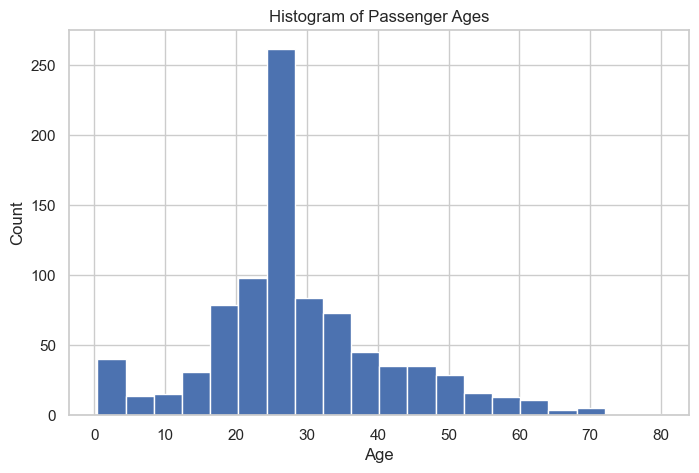

In [24]:
plt.figure(figsize=(8,5))
plt.hist(data['Age'], bins=20)
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\vscha\AppData\Local\Temp\ipykernel_6420\3766955389.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_rates = data.groupby('AgeGroup')['Survived'].mean().reindex(labels)


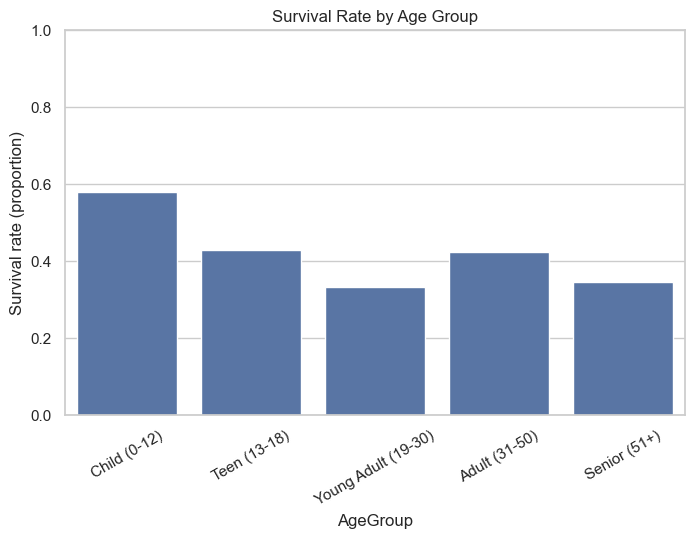

In [25]:
plt.figure(figsize=(8,5))
# compute proportion directly for plotting
age_group_rates = data.groupby('AgeGroup')['Survived'].mean().reindex(labels)
sns.barplot(x=age_group_rates.index, y=age_group_rates.values)
plt.xticks(rotation=30)
plt.ylabel('Survival rate (proportion)')
plt.title('Survival Rate by Age Group')
plt.ylim(0,1)
plt.show()